<a href="https://colab.research.google.com/github/SeonHyungJo/tensorflow-2.0-study/blob/master/Ch05_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 와인 분류
import pandas as pd
red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
print(red)
print(white)

      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.6

In [ ]:
# 레드와인과 화이트와인 데이터를 합치기
red['type'] = 0
white['type'] = 1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red, white])
print(wine.describe())

   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.4              0.70          0.0  ...      9.4        5     0
1            7.8              0.88          0.0  ...      9.8        5     0

[2 rows x 13 columns]
   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.0              0.27         0.36  ...      8.8        6     1
1            6.3              0.30         0.34  ...      9.5        6     1

[2 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        7.215307          0.339666  ...     5.818378     0.753886
std         1.296434          0.164636  ...     0.873255     0.430779
min         3.800000          0.080000  ...     3.000000     0.000000
25%         6.400000          0.230000  ...     5.000000     1.000000
50%         7.000000          0.290000  ...     6.000000     1.000000
75

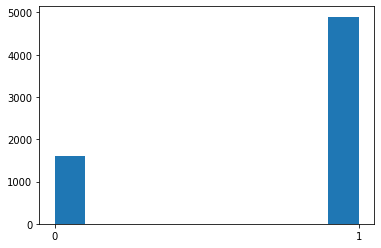

1    4898
0    1599
Name: type, dtype: int64


In [ ]:
# 레드와인과 화이트와인에 대한 type 히스토그램
import matplotlib.pyplot as plt
plt.hist(wine['type'])
plt.xticks([0,1])
plt.show()

print(wine['type'].value_counts())

In [ ]:
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [ ]:
# 데이터 정규화
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
0       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0
1       0.330579          0.533333     0.000000  ...  0.260870  0.333333   0.0
2       0.330579          0.453333     0.024096  ...  0.260870  0.333333   0.0
3       0.611570          0.133333     0.337349  ...  0.260870  0.500000   0.0
4       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0

[5 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        0.282257          0.173111  ...     0.469730     0.753886
std         0.107143          0.109758  ...     0.145543     0.430779
min         0.000000          0.000000  ...     0.000000     0.000000
25%         0.214876          0.100000  ...     0.333333     1.000000
50%         0.264463          0.140000  ...     0.500000     1.000000
75%         0

In [ ]:
# 데이터를 섞은 후 넘파이 array로 변환
import numpy as np
wine_shuffle = wine_norm.sample(frac=1)
print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])


      fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
3628       0.214876          0.200000     0.120482  ...  0.217391  0.500000   1.0
25         0.264463          0.113333     0.192771  ...  0.347826  0.500000   1.0
1463       0.256198          0.366667     0.006024  ...  0.405797  0.500000   0.0
1784       0.239669          0.106667     0.174699  ...  0.521739  0.666667   1.0
342        0.214876          0.120000     0.253012  ...  0.159420  0.500000   1.0

[5 rows x 13 columns]
[[0.21487603 0.2        0.12048193 0.07208589 0.17940199 0.19444444
  0.40322581 0.14420667 0.40310078 0.11797753 0.2173913  0.5
  1.        ]
 [0.26446281 0.11333333 0.19277108 0.12883436 0.06146179 0.19097222
  0.55069124 0.16175053 0.41085271 0.15730337 0.34782609 0.5
  1.        ]
 [0.25619835 0.36666667 0.0060241  0.02760736 0.11129568 0.04513889
  0.07603687 0.15635242 0.48062016 0.1741573  0.4057971  0.5
  0.        ]
 [0.23966942 0.10666667 0.1746988  0.09509202 0.04817276

In [ ]:
# 훈련 데이터와 테스트 데이터로 분리
import tensorflow as tf
train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]

test_X, test_Y = wine_np[train_idx:, : -1], wine_np[train_idx:, -1]
print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])

train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
print(train_Y[0])
print(test_Y[0])

[0.21487603 0.2        0.12048193 0.07208589 0.17940199 0.19444444
 0.40322581 0.14420667 0.40310078 0.11797753 0.2173913  0.5       ]
1.0
[0.21487603 0.05333333 0.15060241 0.0107362  0.06312292 0.06597222
 0.16359447 0.1193368  0.68992248 0.17977528 0.31884058 0.5       ]
1.0
[0. 1.]
[0. 1.]


In [ ]:
# 와인 데이터세트 분류 모델 생성
import tensorflow as tf
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
  tf.keras.layers.Dense(units=24, activation='relu'),
  tf.keras.layers.Dense(units=12, activation='relu'),
  tf.keras.layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 48)                624       
_________________________________________________________________
dense_25 (Dense)             (None, 24)                1176      
_________________________________________________________________
dense_26 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 분류 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 0s 3ms/step - loss: 0.1689 - accuracy: 0.9497 - val_loss: 0.1022 - val_accuracy: 0.9646
Epoch 2/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0624 - accuracy: 0.9820 - val_loss: 0.0268 - val_accuracy: 0.9900
Epoch 3/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0556 - accuracy: 0.9841 - val_loss: 0.0409 - val_accuracy: 0.9931
Epoch 4/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0561 - accuracy: 0.9856 - val_loss: 0.0209 - val_accuracy: 0.9938
Epoch 5/25
122/122 [==============================] - 0s 1ms/step - loss: 0.1102 - accuracy: 0.9749 - val_loss: 0.0374 - val_accuracy: 0.9892
Epoch 6/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0618 - accuracy: 0.9836 - val_loss: 0.0243 - val_accuracy: 0.9931
Epoch 7/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0462 - accuracy: 0.9885 - val_loss: 0.0228 - val_accuracy: 0.9931
Epoch 

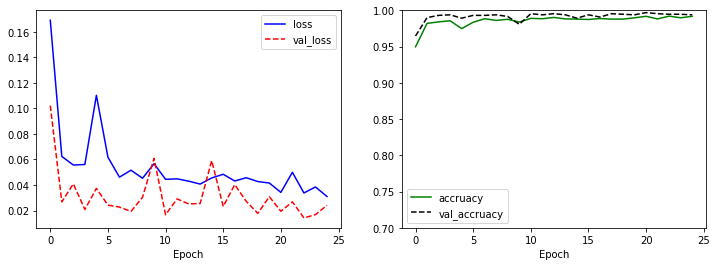

In [ ]:
# 분류 모델의 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accruacy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accruacy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [ ]:
# 분류 모델 평가
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 901us/step - loss: 0.0267 - accuracy: 0.9938


[0.026719525456428528, 0.9938461780548096]

In [ ]:
# 다항분류
# 와인의 품질 예측
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


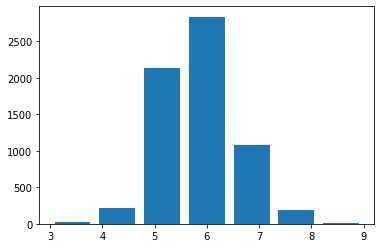

In [ ]:
# 품질 히스토그램 시각화
import matplotlib.pyplot as plt
plt.hist(wine['quality'], bins=7, rwidth=0.8)
plt.show()


In [ ]:
# 품질을 3개의 범주(좋음, 보통, 나쁨)으로 재분류
wine.loc[wine['quality'] <=5, 'new_quaity'] = 0
wine.loc[wine['quality'] ==6, 'new_quaity'] = 1
wine.loc[wine['quality'] >=7, 'new_quaity'] = 2

print(wine['new_quaity'].describe())
print(wine['new_quaity'].value_counts())

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quaity, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quaity, dtype: int64
